### ( 1 ) 데이터 가져오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()

In [3]:
df_X = diabetes.data

In [4]:
df_X.shape, type(df_X)

((442, 10), numpy.ndarray)

In [5]:
df_y = diabetes.target

In [6]:
df_y.shape, type(df_y)

((442,), numpy.ndarray)

### ( 2 ) 모델에 입력할 데이터 X 준비하기 

In [7]:
df_X = np.array(df_X)

In [8]:
type(df_X)

numpy.ndarray

### ( 3 ) 모델에 예측할 데이터 y 준비하기

In [9]:
df_y = np.array(df_y)

In [10]:
type(df_y)

numpy.ndarray

### ( 4 ) train 데이터와 test 데이터로 분리하기

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 32)

### ( 5 ) 모델 준비하기

In [13]:
np.random.seed(10)
w = np.random.rand((df_X.shape[1]))
b = np.random.rand((1))

In [14]:
w.shape, b.shape

((10,), (1,))

In [15]:
w

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981])

In [16]:
b

array([0.68535982])

In [17]:
def model(w, b, x):
    y = np.dot(x, w) + b
    return y

### ( 6 ) 손실함수 loss 정의하기

In [18]:
def MSE(y_pred, y_true):
    loss = np.mean((y_true - y_pred) ** 2)
    return loss

In [19]:
MSE(model(w, b, df_X), df_y)

28856.38666849961

### ( 7 ) 기울기를 구하는 gradient 함수 구현하기

In [20]:
def gradient_descent(w, b, x, y, lr = 0.1):
    N = len(w)
    y_pred = model(w, b, x)
    
    dw = 1/N * 2 * np.dot(x.T,(y_pred - y))
    db = 2 * (y_pred - y).mean()
    
    w = w - dw * lr
    b = b - db * lr
    
    return w, b

### ( 8 ) 하이퍼 파라미터인 학습률 설정하기

In [21]:
lr = 1e-2

### ( 9 ) 모델 학습하기 & ( 10 ) test 데이터에 대한 성능 확인하기

Epoch : 0, Train_loss : 28527.04, Test_loss : 25471.25
Epoch : 100, Train_loss : 4755.40, Test_loss : 3783.85
Epoch : 200, Train_loss : 3725.59, Test_loss : 3162.29
Epoch : 300, Train_loss : 3425.47, Test_loss : 3009.36
Epoch : 400, Train_loss : 3263.73, Test_loss : 2928.67
Epoch : 500, Train_loss : 3162.52, Test_loss : 2880.60
Epoch : 600, Train_loss : 3094.54, Test_loss : 2849.90
Epoch : 700, Train_loss : 3047.23, Test_loss : 2829.70
Epoch : 800, Train_loss : 3013.66, Test_loss : 2816.38
Epoch : 900, Train_loss : 2989.56, Test_loss : 2807.72
Epoch : 1000, Train_loss : 2972.08, Test_loss : 2802.21
Epoch : 1100, Train_loss : 2959.32, Test_loss : 2798.84
Epoch : 1200, Train_loss : 2949.92, Test_loss : 2796.90
Epoch : 1300, Train_loss : 2942.96, Test_loss : 2795.90
Epoch : 1400, Train_loss : 2937.76, Test_loss : 2795.50
Epoch : 1500, Train_loss : 2933.85, Test_loss : 2795.48
Epoch : 1600, Train_loss : 2930.88, Test_loss : 2795.67
Epoch : 1700, Train_loss : 2928.62, Test_loss : 2795.98
Ep

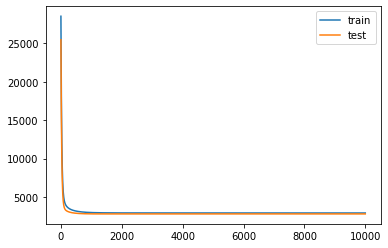

In [22]:
train_loss = []
test_loss = []

for epoch in range(10000):
    
    w, b = gradient_descent(w, b, X_train, y_train, lr)
    loss_1 = MSE(model(w, b, X_train), y_train)
    loss_2 = MSE(model(w, b, X_test), y_test)
    
    train_loss.append(loss_1)
    test_loss.append(loss_2)
    
    if epoch % 100 == 0:
        print('Epoch : {}, Train_loss : {:.2f}, Test_loss : {:.2f}'.format(epoch, loss_1, loss_2))

plt.plot(train_loss, label='train')
plt.plot(test_loss, label = 'test')
plt.legend()

In [23]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [24]:
df = pd.DataFrame(df_X, columns = diabetes.feature_names)

In [25]:
df['label'] = diabetes.target

In [26]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


#### test 1. s6 feature 제거

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3']], df_y, test_size = 0.2, random_state = 32)

In [28]:
np.random.seed(10)
w = np.random.rand((X_train.shape[1]))
b = np.random.rand((1))

In [29]:
lr = 1e-2

Epoch : 0, Train_loss : 28513.55, Test_loss : 25460.59
Epoch : 100, Train_loss : 4998.19, Test_loss : 4031.98
Epoch : 200, Train_loss : 3970.18, Test_loss : 3414.47
Epoch : 300, Train_loss : 3653.45, Test_loss : 3258.69
Epoch : 400, Train_loss : 3487.92, Test_loss : 3187.15
Epoch : 500, Train_loss : 3392.05, Test_loss : 3154.38
Epoch : 600, Train_loss : 3332.80, Test_loss : 3139.68
Epoch : 700, Train_loss : 3294.25, Test_loss : 3133.53
Epoch : 800, Train_loss : 3268.04, Test_loss : 3131.41
Epoch : 900, Train_loss : 3249.44, Test_loss : 3131.09
Epoch : 1000, Train_loss : 3235.69, Test_loss : 3131.37
Epoch : 1100, Train_loss : 3225.08, Test_loss : 3131.65
Epoch : 1200, Train_loss : 3216.54, Test_loss : 3131.61
Epoch : 1300, Train_loss : 3209.41, Test_loss : 3131.12
Epoch : 1400, Train_loss : 3203.24, Test_loss : 3130.14
Epoch : 1500, Train_loss : 3197.75, Test_loss : 3128.69
Epoch : 1600, Train_loss : 3192.75, Test_loss : 3126.80
Epoch : 1700, Train_loss : 3188.12, Test_loss : 3124.54
Ep

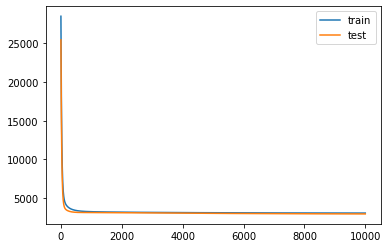

In [30]:
train_loss = []
test_loss = []

for epoch in range(10000):
    
    w, b = gradient_descent(w, b, X_train, y_train, lr)
    loss_1 = MSE(model(w, b, X_train), y_train)
    loss_2 = MSE(model(w, b, X_test), y_test)
    
    train_loss.append(loss_1)
    test_loss.append(loss_2)
    
    if epoch % 100 == 0:
        print('Epoch : {}, Train_loss : {:.2f}, Test_loss : {:.2f}'.format(epoch, loss_1, loss_2))

plt.plot(train_loss, label='train')
plt.plot(test_loss, label = 'test')
plt.legend()

#### test 2. s5 feature 제거

Epoch : 0, Train_loss : 28706.30, Test_loss : 25643.84
Epoch : 100, Train_loss : 4943.74, Test_loss : 3966.03
Epoch : 200, Train_loss : 3946.09, Test_loss : 3369.37
Epoch : 300, Train_loss : 3649.72, Test_loss : 3228.49
Epoch : 400, Train_loss : 3487.56, Test_loss : 3157.96
Epoch : 500, Train_loss : 3386.13, Test_loss : 3119.16
Epoch : 600, Train_loss : 3318.22, Test_loss : 3096.55
Epoch : 700, Train_loss : 3270.91, Test_loss : 3083.13
Epoch : 800, Train_loss : 3237.08, Test_loss : 3075.30
Epoch : 900, Train_loss : 3212.37, Test_loss : 3070.95
Epoch : 1000, Train_loss : 3193.97, Test_loss : 3068.75
Epoch : 1100, Train_loss : 3180.00, Test_loss : 3067.81
Epoch : 1200, Train_loss : 3169.18, Test_loss : 3067.57
Epoch : 1300, Train_loss : 3160.62, Test_loss : 3067.62
Epoch : 1400, Train_loss : 3153.69, Test_loss : 3067.75
Epoch : 1500, Train_loss : 3147.95, Test_loss : 3067.80
Epoch : 1600, Train_loss : 3143.11, Test_loss : 3067.68
Epoch : 1700, Train_loss : 3138.92, Test_loss : 3067.37
Ep

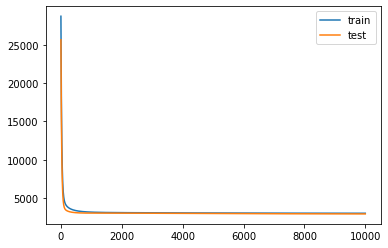

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's6']], df_y, test_size = 0.2, random_state = 32)

np.random.seed(10)
w = np.random.rand((X_train.shape[1]))
b = np.random.rand((1))

train_loss = []
test_loss = []

for epoch in range(10000):
    
    w, b = gradient_descent(w, b, X_train, y_train, lr)
    loss_1 = MSE(model(w, b, X_train), y_train)
    loss_2 = MSE(model(w, b, X_test), y_test)
    
    train_loss.append(loss_1)
    test_loss.append(loss_2)
    
    if epoch % 100 == 0:
        print('Epoch : {}, Train_loss : {:.2f}, Test_loss : {:.2f}'.format(epoch, loss_1, loss_2))

plt.plot(train_loss, label='train')
plt.plot(test_loss, label = 'test')
plt.legend()

#### test 3. sex feature 제거

Epoch : 0, Train_loss : 28700.60, Test_loss : 25638.57
Epoch : 100, Train_loss : 4662.89, Test_loss : 3703.55
Epoch : 200, Train_loss : 3672.67, Test_loss : 3112.68
Epoch : 300, Train_loss : 3419.76, Test_loss : 2989.34
Epoch : 400, Train_loss : 3295.43, Test_loss : 2926.15
Epoch : 500, Train_loss : 3222.73, Test_loss : 2887.48
Epoch : 600, Train_loss : 3176.30, Test_loss : 2861.07
Epoch : 700, Train_loss : 3145.08, Test_loss : 2841.81
Epoch : 800, Train_loss : 3123.33, Test_loss : 2827.16
Epoch : 900, Train_loss : 3107.75, Test_loss : 2815.67
Epoch : 1000, Train_loss : 3096.32, Test_loss : 2806.41
Epoch : 1100, Train_loss : 3087.77, Test_loss : 2798.79
Epoch : 1200, Train_loss : 3081.25, Test_loss : 2792.39
Epoch : 1300, Train_loss : 3076.20, Test_loss : 2786.94
Epoch : 1400, Train_loss : 3072.25, Test_loss : 2782.25
Epoch : 1500, Train_loss : 3069.11, Test_loss : 2778.17
Epoch : 1600, Train_loss : 3066.60, Test_loss : 2774.60
Epoch : 1700, Train_loss : 3064.58, Test_loss : 2771.47
Ep

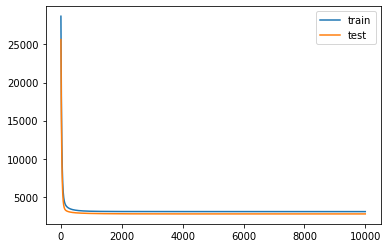

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']], df_y, test_size = 0.2, random_state = 32)

np.random.seed(10)
w = np.random.rand((X_train.shape[1]))
b = np.random.rand((1))

train_loss = []
test_loss = []

for epoch in range(10000):
    
    w, b = gradient_descent(w, b, X_train, y_train, lr)
    loss_1 = MSE(model(w, b, X_train), y_train)
    loss_2 = MSE(model(w, b, X_test), y_test)
    
    train_loss.append(loss_1)
    test_loss.append(loss_2)
    
    if epoch % 100 == 0:
        print('Epoch : {}, Train_loss : {:.2f}, Test_loss : {:.2f}'.format(epoch, loss_1, loss_2))

plt.plot(train_loss, label='train')
plt.plot(test_loss, label = 'test')
plt.legend()

### ( 11 ) 정답 데이터와 예측한 데이터 시각화하기

In [33]:
y_pred = model(w, b , X_test)

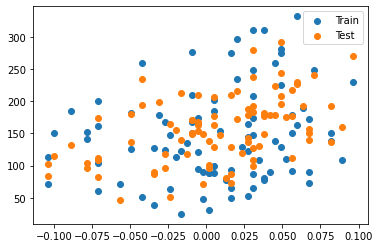

In [34]:
plt.scatter(X_test.iloc[:,0], y_test, label='Train')
plt.scatter(X_test.iloc[:,0], y_pred, label='Test')
plt.legend()

### ( 12 ) Discussion

#### 성급한 일반화일수도 있으나, 모든 feature를 다 사용했을 때보다 적절한 feature를 선택하여 사용하는 것이 성능개선에 더 도움이 될 수 있는 것 같다. 
#### 그 예시로 성별 feature를 제거 했을 떄의 loss값이 모든 feature를 다 사용했을 때보다 더 loss가 작았다.